# Make Species Venn Diagram

8
727
175
FungiDB:
23
170
60
5
8
6
0
933
249
175
48


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


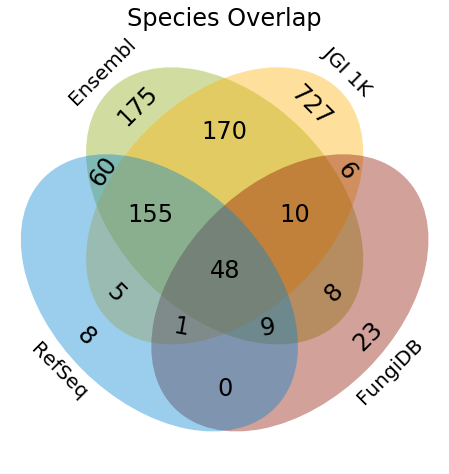

In [1]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/fungi.db')
      
occur_once = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1;", cnx)

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2;", cnx)

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3;", cnx)

occur_quad = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 4;", cnx)


# Combos of one
ENSEMBL = 0 
ONEK = 0 
NCBI = 0 
FUNGIDB = 0 


NCBI = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI';", cnx)

ONEK = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K';", cnx)

ENSEMBL = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE';", cnx)

FUNGIDB = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB';", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)



# combos of two
ENSEMBL_ONEK = 0 
ENSEMBL_NCBI = 0 
ONEK_NCBI = 0 
ENSEMBL_FUNGIDB = 0 
ONEK_FUNGIDB = 0
NCBI_FUNGIDB = 0


for index, row in occur_twice.iterrows():
    SPECIESTAXID = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM FUNGI_DB WHERE SPECIESTAXID = {SPECIESTAXID}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1:  
        ENSEMBL_ONEK += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_NCBI += 1
    if NCBI_tmp == 1 and ONEK_tmp == 1: 
        ONEK_NCBI += 1        
    if ENSEMBL_tmp == 1 and FUNGIDB_tmp == 1:
        ENSEMBL_FUNGIDB += 1  
    if ONEK_tmp == 1 and FUNGIDB_tmp == 1:
        ONEK_FUNGIDB += 1
    if NCBI_tmp == 1 and FUNGIDB_tmp == 1:
        NCBI_FUNGIDB += 1 

print(ENSEMBL_ONEK)
print(ENSEMBL_NCBI)
print(ONEK_NCBI)
print(ENSEMBL_FUNGIDB)
print(ONEK_FUNGIDB)
print(NCBI_FUNGIDB)


# Combos of three
ENSEMBL_ONEK_NCBI = 0 
ENSEMBL_ONEK_FUNGIDB = 0 
ENSEMBL_NCBI_FUNGIDB = 0 
ONEK_NCBI_FUNGIDB = 0

for index, row in occur_thrice.iterrows():
    SPECIESTAXID = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM FUNGI_DB WHERE SPECIESTAXID = {SPECIESTAXID}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_ONEK_NCBI += 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and FUNGIDB_tmp == 1:  
        ENSEMBL_ONEK_FUNGIDB += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1 and FUNGIDB_tmp == 1: 
        ENSEMBL_NCBI_FUNGIDB += 1
    if ONEK_tmp == 1 and NCBI_tmp ==1 and FUNGIDB_tmp == 1:
        ONEK_NCBI_FUNGIDB += 1

        

        
# combos of four
ENSEMBL_ONEK_NCBI_FUNGIDB = occur_quad.size


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)
print(occur_quad.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations
sets = 'ENSEMBL 1K NCBI FUNGIDB'.split()
subsets = [ENSEMBL.size, ONEK.size, NCBI.size, FUNGIDB.size, ENSEMBL_ONEK, ENSEMBL_NCBI, ENSEMBL_FUNGIDB, ONEK_NCBI, ONEK_FUNGIDB, NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI, ENSEMBL_ONEK_FUNGIDB, ENSEMBL_NCBI_FUNGIDB, ONEK_NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI_FUNGIDB]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('Ensembl', 'JGI 1K', 'RefSeq', 'FungiDB'), set_label_fontsize=20, subset_label_fontsize=24);


ax.set_title('Species Overlap', fontsize=24)
plt.savefig('primary_fig/fungi_SPECIES_Distribution.png', bbox_inches='tight')
plt.savefig('primary_fig/fungi_SPECIES_Distribution.pdf', bbox_inches='tight')
plt.savefig('primary_fig/fungi_SPECIES_Distribution.eps', bbox_inches='tight')

# Make Venn Diagram for Genus

1
448
43
FungiDB:
14
107
25
2
1
7
0
506
142
109
29


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


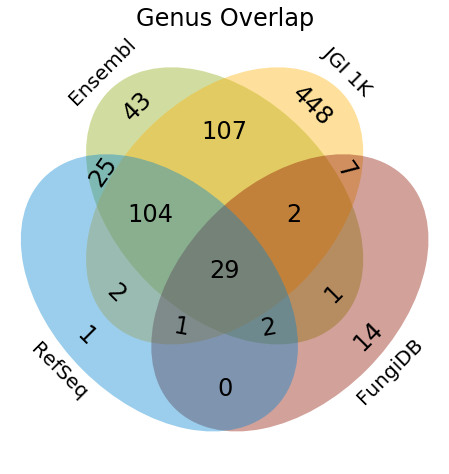

In [2]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/fungi.db')
      
occur_once = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

occur_quad = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 4", cnx)


# Combos of one
ENSEMBL = 0 
ONEK = 0 
NCBI = 0 
FUNGIDB = 0 


NCBI = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

FUNGIDB = pd.read_sql_query("SELECT GENUSTAXID FROM FUNGI_DB WHERE GENUSTAXID IS NOT NULL Group by GENUSTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB'", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)



# combos of two
ENSEMBL_ONEK = 0 
ENSEMBL_NCBI = 0 
ONEK_NCBI = 0 
ENSEMBL_FUNGIDB = 0 
ONEK_FUNGIDB = 0
NCBI_FUNGIDB = 0


for index, row in occur_twice.iterrows():
    GENUSTAXID = row["GENUSTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM FUNGI_DB WHERE GENUSTAXID = {GENUSTAXID}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1:  
        ENSEMBL_ONEK += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_NCBI += 1
    if NCBI_tmp == 1 and ONEK_tmp == 1: 
        ONEK_NCBI += 1        
    if ENSEMBL_tmp == 1 and FUNGIDB_tmp == 1:
        ENSEMBL_FUNGIDB += 1  
    if ONEK_tmp == 1 and FUNGIDB_tmp == 1:
        ONEK_FUNGIDB += 1
    if NCBI_tmp == 1 and FUNGIDB_tmp == 1:
        NCBI_FUNGIDB += 1 

print(ENSEMBL_ONEK)
print(ENSEMBL_NCBI)
print(ONEK_NCBI)
print(ENSEMBL_FUNGIDB)
print(ONEK_FUNGIDB)
print(NCBI_FUNGIDB)


# Combos of three
ENSEMBL_ONEK_NCBI = 0 
ENSEMBL_ONEK_FUNGIDB = 0 
ENSEMBL_NCBI_FUNGIDB = 0 
ONEK_NCBI_FUNGIDB = 0

for index, row in occur_thrice.iterrows():
    GENUSTAXID = row["GENUSTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM FUNGI_DB WHERE GENUSTAXID = {GENUSTAXID}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_ONEK_NCBI += 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and FUNGIDB_tmp == 1:  
        ENSEMBL_ONEK_FUNGIDB += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1 and FUNGIDB_tmp == 1: 
        ENSEMBL_NCBI_FUNGIDB += 1
    if ONEK_tmp == 1 and NCBI_tmp ==1 and FUNGIDB_tmp == 1:
        ONEK_NCBI_FUNGIDB += 1

        

        
# combos of four
ENSEMBL_ONEK_NCBI_FUNGIDB = occur_quad.size


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)
print(occur_quad.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations
sets = 'ENSEMBL 1K NCBI FUNGIDB'.split()
subsets = [ENSEMBL.size, ONEK.size, NCBI.size, FUNGIDB.size, ENSEMBL_ONEK, ENSEMBL_NCBI, ENSEMBL_FUNGIDB, ONEK_NCBI, ONEK_FUNGIDB, NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI, ENSEMBL_ONEK_FUNGIDB, ENSEMBL_NCBI_FUNGIDB, ONEK_NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI_FUNGIDB]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('Ensembl', 'JGI 1K', 'RefSeq', 'FungiDB'), set_label_fontsize=20, subset_label_fontsize=24);


ax.set_title('Genus Overlap', fontsize=24)
plt.savefig('primary_fig/fungi_GENUS_Distribution.png', bbox_inches='tight')
plt.savefig('primary_fig/fungi_GENUS_Distribution.pdf', bbox_inches='tight')
plt.savefig('primary_fig/fungi_GENUS_Distribution.eps', bbox_inches='tight')

# Contig length distribution

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/fungi.db')

ncbi = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = 'FUNGIDB'", cnx)


NCBI_chr = []
NCBI_contig = []
ONEK_chr = []
ONEK_contig = []
ENSEMBL_chr = []
ENSEMBL_contig  = []
FUNGIDB_chr = []
FUNGIDB_contig = []

#  divided by 1 million to correct y axis to be terms of millions

for index, row in ncbi.iterrows():
    if row["avg_length_contig"] > 0:
        NCBI_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_contig"] > 0:
        ONEK_contig.append(row["avg_length_contig"] / 1000000.0)
        
for index, row in ensembl.iterrows():
    if row["avg_length_contig"] > 0:
        ENSEMBL_contig.append(row["avg_length_contig"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_contig"] > 0:
        FUNGIDB_contig.append(row["avg_length_contig"] / 1000000.0)



file=open('fungi.contig.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_chr:
    if i!=0:
        file.write('RefSeq,chr,'+str(i))
        file.write("\n")

for i in NCBI_contig:
    if i!=0:
        file.write('RefSeq,contig,'+str(i))
        file.write("\n")

for i in ENSEMBL_chr:
    if i!=0:
        file.write('Ensembl,chr,'+str(i))
        file.write("\n")

for i in ENSEMBL_contig:
    if i!=0:
        file.write('Ensembl,contig,'+str(i))
        file.write("\n")
        
for i in ONEK_chr:
    if i!=0:
        file.write('JGI1K,chr,'+str(i))
        file.write("\n")

for i in ONEK_contig:
    if i!=0:
        file.write('JGI1K,contig,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_chr:
    if i!=0:
        file.write('FungiDB,chr,'+str(i))
        file.write("\n")

for i in FUNGIDB_contig:
    if i!=0:
        file.write('FungiDB,contig,'+str(i))
        file.write("\n")
        
file.close()

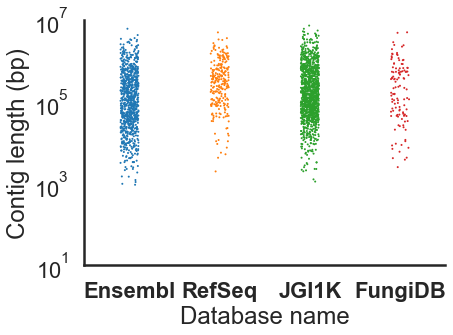

In [25]:
import seaborn as sns

data=pd.read_csv('fungi.contig.length.csv')
data['length_real'] = data['length'] * 1000000

g=sns.set_style("white")
g=sns.set_context("poster")


# ax = sns.boxplot(y="length_real", x="db", data=data, order = ["ENSEMBL", "REFSEQ", "JGI1K", "FUNGIDB"])
ax = sns.catplot(y="length_real", x="db", data=data, order = ["Ensembl", "RefSeq", "JGI1K", "FungiDB"], height=5,aspect=1.5, s=2)

# ax = sns.violinplot(y="length", x="db", data=data, order = ["ENSEMBL", "REFSEQ", "JGI1K", "FUNGIDB"])
ax.set(ylabel='Contig length (bp)', xlabel='Database name', yscale = 'log', ylim = (10, 10000000))

# ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
plt.savefig("primary_fig/fungi.dot.contig.length.png", bbox_inches='tight')
plt.savefig("primary_fig/fungi.dot.contig.length.pdf", bbox_inches='tight')
plt.savefig("primary_fig/fungi.dot.contig.length.eps", bbox_inches='tight')

In [5]:
# get numbers for averages

df1 = data.groupby("db").sum()
df2 = data.groupby("db").count()

print("Sum: ")
print(df1)
print("Count: ")
print(df2)


Sum: 
             length  length_real
db                              
ENSEMBL  274.472139  274472139.0
FUNGIDB   60.065279   60065279.0
JGI1K    530.372728  530372728.0
REFSEQ   136.394637  136394637.0
Count: 
         type  length  length_real
db                                
ENSEMBL   852     852          852
FUNGIDB   117     117          117
JGI1K    1245    1245         1245
REFSEQ    249     249          249


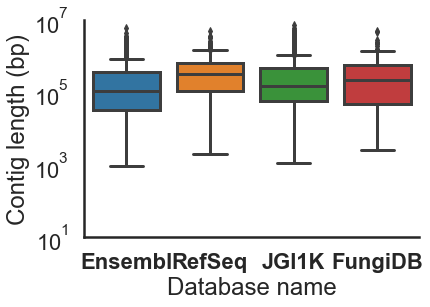

In [26]:
import seaborn as sns

g=sns.set_style("white")
g=sns.set_context("poster")

# data = data.loc[data.length < 1] # remove extrema

ax = sns.boxplot(y="length_real", x="db", data=data, order = ["Ensembl", "RefSeq", "JGI1K", "FungiDB"])

# ax = sns.violinplot(y="length", x="db", data=data, order = ["ENSEMBL", "REFSEQ", "JGI1K", "FUNGIDB"])
ax.set(ylabel='Contig length (bp)', xlabel='Database name', yscale = 'log',  ylim = (10, 10000000))

# ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold')

g=sns.despine()
plt.savefig("primary_fig/fungi.box.contig.length.png", bbox_inches='tight')
plt.savefig("primary_fig/fungi.box.contig.length.pdf", bbox_inches='tight')
plt.savefig("primary_fig/fungi.box.contig.length.eps", bbox_inches='tight')

#    Chromosome length distribution

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import csv
cnx = sqlite3.connect(r'../data/fungi.db')

ncbi = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = 'NCBI'", cnx)
onek = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = '1K'", cnx)
ensembl = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = 'ENSEMBLE'", cnx)
fungidb = pd.read_sql_query("SELECT * FROM FUNGI_DB WHERE DBNAME = 'FUNGIDB'", cnx)


NCBI_chr = []
ONEK_chr = []
ENSEMBL_chr = []
FUNGIDB_chr = []


#  divided by 1 million to correct y axis to be terms of millions
for index, row in ncbi.iterrows():
    if row["avg_length_chromosomes"] > 0:
        NCBI_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in onek.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ONEK_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in ensembl.iterrows():
    if row["avg_length_chromosomes"] > 0:
        ENSEMBL_chr.append(row["avg_length_chromosomes"] / 1000000.0)

for index, row in fungidb.iterrows():
    if row["avg_length_chromosomes"] > 0:
        FUNGIDB_chr.append(row["avg_length_chromosomes"] / 1000000.0)


file=open('fungi.chr.length.csv','w')
file.write('db,type,length\n')

for i in NCBI_chr:
    if i!=0:
        file.write('RefSeq,chr,'+str(i))
        file.write("\n")


for i in ENSEMBL_chr:
    if i!=0:
        file.write('Ensembl,chr,'+str(i))
        file.write("\n")
        
for i in ONEK_chr:
    if i!=0:
        file.write('JGI1K,chr,'+str(i))
        file.write("\n")
        
for i in FUNGIDB_chr:
    if i!=0:
        file.write('FungiDB,chr,'+str(i))
        file.write("\n")
        
        
file.close()


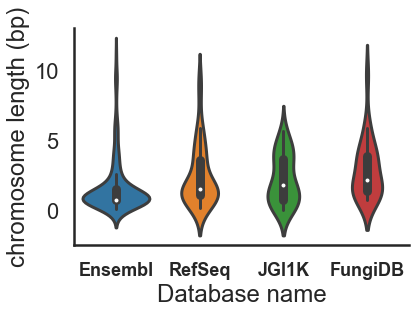

In [6]:
import seaborn as sns
import pandas as pd
chr_data=pd.read_csv('fungi.chr.length.csv')


g=sns.set_style("white")
g=sns.set_context("poster")

ax = sns.violinplot(y="length", x="db", data=chr_data,  order = ["Ensembl", "RefSeq", "JGI1K", "FungiDB"])
ax.set(ylabel='chromosome length (bp)', xlabel='Database name')

ax.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xticks(fontweight='bold', fontsize=18)

g=sns.despine()
plt.savefig("supplementary_fig/fungi.chr.length.png", bbox_inches='tight')
plt.savefig("supplementary_fig/fungi.chr.length.pdf", bbox_inches='tight')
plt.savefig("supplementary_fig/fungi.chr.length.eps", bbox_inches='tight')

In [9]:
# get numbers for averages

df1 = chr_data.groupby("db").sum()
df2 = chr_data.groupby("db").count()

print("Sum: ")
print(df1)
print("Count: ")
print(df2)

Sum: 
             length
db                 
ENSEMBL  341.600334
FUNGIDB   75.340762
JGI1K     62.423989
REFSEQ   136.311298
Count: 
         type  length
db                   
ENSEMBL   206     206
FUNGIDB    26      26
JGI1K      28      28
REFSEQ     55      55


# Combined DNA Type Breakdown (Ensembl, 1K, RefSeq, FungiDB)

[ENSEMBL, RefSeq, 1K, FUNGIDB]
chrom: [15.680473372781064, 13.793103448275861, 1.5810276679841897, 12.686567164179104]
contig: [79.6844181459566, 81.03448275862068, 97.78656126482214, 80.59701492537313]
chrom_and_contig [4.6351084812623276, 5.172413793103448, 0.6324110671936759, 6.7164179104477615]


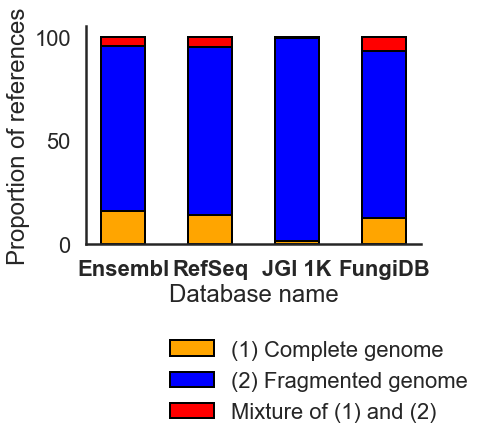

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import sqlite3
 
cnx = sqlite3.connect(r'../data/fungi.db')

ensembl_total = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE'", cnx).size
ensembl_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count == 0", cnx).size / ensembl_total)*100
ensembl_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE' AND chromosome_count == 0 AND contig_count >0", cnx).size / ensembl_total)*100
ensembl_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count > 0", cnx).size / ensembl_total)*100

ncbi_total = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI'", cnx).size
ncbi_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count == 0", cnx).size / ncbi_total)*100
ncbi_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI' AND chromosome_count == 0 AND contig_count >0", cnx).size / ncbi_total)*100
ncbi_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count > 0", cnx).size / ncbi_total)*100


onek_total = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K' AND (chromosome_count > 0 OR contig_count > 0)", cnx).size
onek_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K' AND chromosome_count > 0 AND contig_count == 0", cnx).size / onek_total)*100
onek_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K' AND chromosome_count == 0 AND contig_count >0", cnx).size / onek_total)*100
onek_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K' AND chromosome_count > 0 AND contig_count > 0", cnx).size / onek_total)*100

fungidb_total = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB'", cnx).size
fungidb_chr = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB' AND chromosome_count > 0 AND contig_count == 0", cnx).size / fungidb_total)*100
fungidb_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB' AND chromosome_count == 0 AND contig_count >0", cnx).size / fungidb_total)*100
fungidb_chrom_and_contig = (pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB' AND chromosome_count > 0 AND contig_count > 0", cnx).size / fungidb_total)*100


# [ENSEMBLE, RefSeq, 1K, FungiDB]
chrom = [ensembl_chr, ncbi_chr, onek_chr, fungidb_chr]
contig = [ensembl_contig, ncbi_contig, onek_contig, fungidb_contig]
chrom_and_contig = [ensembl_chrom_and_contig ,ncbi_chrom_and_contig, onek_chrom_and_contig, fungidb_chrom_and_contig]


print("[ENSEMBL, RefSeq, 1K, FUNGIDB]")
print("chrom:", chrom) 
print("contig:", contig) 
print("chrom_and_contig", chrom_and_contig)

# Heights of chrom + contig
bars = [ensembl_chr + ensembl_contig, ncbi_chr + ncbi_contig, onek_chr + onek_contig, fungidb_chr + fungidb_contig]

# Heights of chrom + contig + mixture
# bars2 = [bars[0] + ensembl_chrom_and_contig , bars[1] +ncbi_chrom_and_contig, bars[2] + onek_chrom_and_contig]

# The position of the bars on the x-axis
r = [0,2,4,6]

# Names of group and bar width
names = ['Ensembl','RefSeq','JGI 1K','FungiDB']
barWidth = 1

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, chrom, color='orange', edgecolor='black', width=barWidth)
# Create blue bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, contig, bottom=chrom, color='blue', edgecolor='black', width=barWidth)
# Create red bars (second from top)
p3 = plt.bar(r, chrom_and_contig, bottom=bars, color='red', edgecolor='black', width=barWidth)


# create green bars (top) containing plasmid sequences
# p4 = plt.bar(r, other, bottom=bars2, color='green', edgecolor='black', width=barWidth)


# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Proportion of references")

#  legend
plt.legend((p1[0], p2[0], p3[0]), ('(1) Complete genome', '(2) Fragmented genome', 'Mixture of (1) and (2)'), bbox_to_anchor=(1.2, -0.35),frameon=False)




g=sns.despine()
plt.savefig("primary_fig/fungi.contigs.vs.chr.png", bbox_inches='tight')
plt.savefig("primary_fig/fungi.contigs.vs.chr.pdf", bbox_inches='tight')
plt.savefig("primary_fig/fungi.contigs.vs.chr.eps", bbox_inches='tight')

2
1
13
FungiDB:
0
1
11
0
0
2
0
16
14
16
7


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

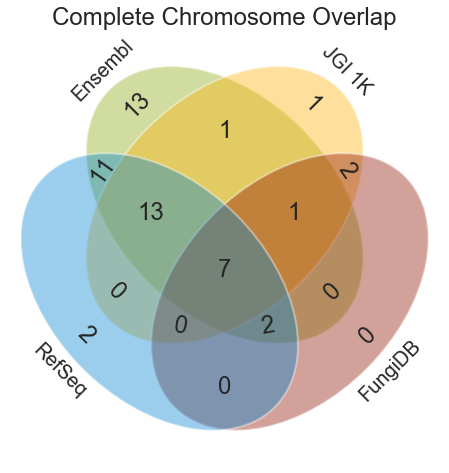

In [11]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

cnx = sqlite3.connect(r'../data/fungi.db')
      
occur_once = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND chromosome_count > 0 AND contig_count = 0;", cnx)

occur_twice = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 2 AND chromosome_count > 0 AND contig_count = 0;", cnx)

occur_thrice = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 3 AND chromosome_count > 0 AND contig_count = 0;", cnx)

occur_quad = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 4 AND chromosome_count > 0 AND contig_count = 0;", cnx)


# Combos of one
ENSEMBL = 0 
ONEK = 0 
NCBI = 0 
FUNGIDB = 0 


NCBI = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI' AND chromosome_count > 0 AND contig_count = 0;", cnx)

ONEK = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K' AND chromosome_count > 0 AND contig_count = 0;", cnx)

ENSEMBL = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count = 0;", cnx)

FUNGIDB = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB WHERE SPECIESTAXID IS NOT NULL Group by SPECIESTAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'FUNGIDB' AND chromosome_count > 0 AND contig_count = 0;", cnx)


print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)
print("FungiDB:")
print(FUNGIDB.size)



# combos of two
ENSEMBL_ONEK = 0 
ENSEMBL_NCBI = 0 
ONEK_NCBI = 0 
ENSEMBL_FUNGIDB = 0 
ONEK_FUNGIDB = 0
NCBI_FUNGIDB = 0


for index, row in occur_twice.iterrows():
    SPECIESTAXID = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM FUNGI_DB WHERE SPECIESTAXID = {SPECIESTAXID}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1:  
        ENSEMBL_ONEK += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_NCBI += 1
    if NCBI_tmp == 1 and ONEK_tmp == 1: 
        ONEK_NCBI += 1        
    if ENSEMBL_tmp == 1 and FUNGIDB_tmp == 1:
        ENSEMBL_FUNGIDB += 1  
    if ONEK_tmp == 1 and FUNGIDB_tmp == 1:
        ONEK_FUNGIDB += 1
    if NCBI_tmp == 1 and FUNGIDB_tmp == 1:
        NCBI_FUNGIDB += 1 

print(ENSEMBL_ONEK)
print(ENSEMBL_NCBI)
print(ONEK_NCBI)
print(ENSEMBL_FUNGIDB)
print(ONEK_FUNGIDB)
print(NCBI_FUNGIDB)


# Combos of three
ENSEMBL_ONEK_NCBI = 0 
ENSEMBL_ONEK_FUNGIDB = 0 
ENSEMBL_NCBI_FUNGIDB = 0 
ONEK_NCBI_FUNGIDB = 0

for index, row in occur_thrice.iterrows():
    SPECIESTAXID = row["SPECIESTAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM FUNGI_DB WHERE SPECIESTAXID = {SPECIESTAXID}", cnx)
    ENSEMBL_tmp = 0
    NCBI_tmp = 0
    ONEK_tmp = 0
    FUNGIDB_tmp = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBL_tmp = 1
        if r["DBNAME"] == "NCBI":
            NCBI_tmp = 1
        if r["DBNAME"] == "1K":
            ONEK_tmp = 1
        if r["DBNAME"] == "FUNGIDB":
            FUNGIDB_tmp = 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and NCBI_tmp == 1:  
        ENSEMBL_ONEK_NCBI += 1
    if ENSEMBL_tmp == 1 and ONEK_tmp == 1 and FUNGIDB_tmp == 1:  
        ENSEMBL_ONEK_FUNGIDB += 1
    if ENSEMBL_tmp == 1 and NCBI_tmp == 1 and FUNGIDB_tmp == 1: 
        ENSEMBL_NCBI_FUNGIDB += 1
    if ONEK_tmp == 1 and NCBI_tmp ==1 and FUNGIDB_tmp == 1:
        ONEK_NCBI_FUNGIDB += 1

        

        
# combos of four
ENSEMBL_ONEK_NCBI_FUNGIDB = occur_quad.size


print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)
print(occur_quad.size)


import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4
%matplotlib inline


# Combinations
sets = 'ENSEMBL 1K NCBI FUNGIDB'.split()
subsets = [ENSEMBL.size, ONEK.size, NCBI.size, FUNGIDB.size, ENSEMBL_ONEK, ENSEMBL_NCBI, ENSEMBL_FUNGIDB, ONEK_NCBI, ONEK_FUNGIDB, NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI, ENSEMBL_ONEK_FUNGIDB, ENSEMBL_NCBI_FUNGIDB, ONEK_NCBI_FUNGIDB, ENSEMBL_ONEK_NCBI_FUNGIDB]

fig, axes = plt.subplots(figsize=(24, 8))
ax = axes
out = venn4(subsets, ax=ax, set_labels = ('Ensembl', 'JGI 1K', 'RefSeq', 'FungiDB'), set_label_fontsize=20, subset_label_fontsize=24);


ax.set_title('Complete Chromosome Overlap', fontsize=24)
plt.savefig('supplementary_fig/fungi_chr_Distribution_by_SPECIES.png', bbox_inches='tight')
plt.savefig('supplementary_fig/fungi_chr_Distribution_by_SPECIES.pdf', bbox_inches='tight')
plt.savefig('supplementary_fig/fungi_chr_Distribution_by_SPECIES.eps', bbox_inches='tight')

# Mitochondrial Composition

ensembl_species 1014
290
1265
134
ensembl_mt_species 152
NCBI_mt_species 44
OneK_mt_species 0
fungidb_mt_species 53
[ENSEMBLE, NCBI, 1k, FUNGIDB] percent mitochondria present
[ENSEMBLE, NCBI, 1k, FUNGIDB]
proportion_mt [14.990138067061142, 15.172413793103448, 25.493885230479773, 39.55223880597015]
proportion_NO_mt [85.00986193293886, 84.82758620689656, 74.50611476952022, 60.44776119402985]


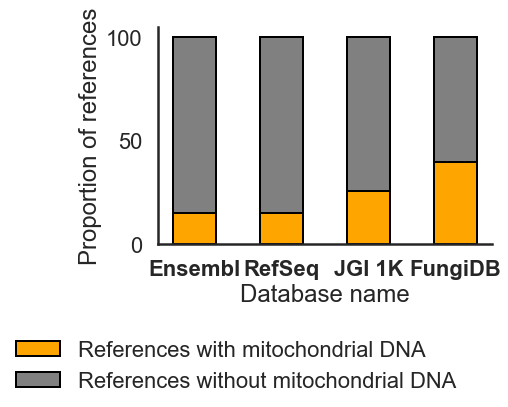

In [12]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd
import seaborn as sns


cnx = sqlite3.connect(r'../data/fungi.db')


ensembl_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K'", cnx).size
fungidb_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB'", cnx).size



ensembl_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE' AND mtDNA_count > 0", cnx).size
NCBI_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI' AND mtDNA_count > 0", cnx).size
OneK_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K' AND mtDNA_count > 0", cnx).size
fungidb_mt_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB' AND mtDNA_count > 0", cnx).size



prop_ensembl_with_mt = (ensembl_mt_species / float(ensembl_species) ) * 100.0
prop_NCBI_with_mt = (NCBI_mt_species / float(NCBI_species) ) * 100.0
# prop_1K_with_mt = (OneK_mt_species / float(OneK_species) ) * 100.0
prop_1K_with_mt = 271/1063 * 100.0
prop_fungidb_with_mt = (fungidb_mt_species/ float(fungidb_species) ) * 100.0 


print("ensembl_species",ensembl_species)
print(NCBI_species)
print(OneK_species)
print(fungidb_species)

print("ensembl_mt_species",ensembl_mt_species)
print("NCBI_mt_species",NCBI_mt_species)
print("OneK_mt_species",OneK_mt_species)
print("fungidb_mt_species", fungidb_mt_species)

    # [ENSEMBLE, NCBI, 1k]
proportion_mt = [prop_ensembl_with_mt, prop_NCBI_with_mt, prop_1K_with_mt, prop_fungidb_with_mt]
proportion_no_mt = [100 - prop_ensembl_with_mt, 100 - prop_NCBI_with_mt, 100 - prop_1K_with_mt, 100 - prop_fungidb_with_mt]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent mitochondria present")
print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print("proportion_mt", proportion_mt)
print("proportion_NO_mt", proportion_no_mt)


# The position of the bars on the x-axis
r = [0,2,4,6]
 
# Names of group and bar width
names = ['Ensembl','RefSeq','JGI 1K', "FungiDB"]
barWidth = 1
 

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for chromosomes
p1 = plt.bar(r, proportion_mt, color='orange', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the firs ones for contigs
p2 = plt.bar(r, proportion_no_mt, bottom=proportion_mt, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Proportion of references")

#  legend
plt.legend((p1[0], p2[0]), ('References with mitochondrial DNA', 'References without mitochondrial DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)

g=sns.despine()
plt.savefig("supplementary_fig/MT.png", bbox_inches='tight')

# Plasmid composition

1014
290
1265
134
72
1
0
0
[ENSEMBLE, NCBI, 1k, FUNGIDB]
[7.100591715976331, 0.3448275862068966, 0.0, 0.0]


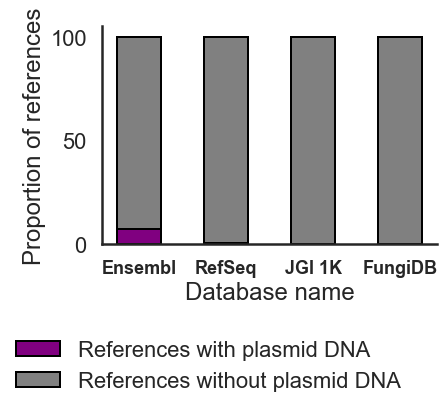

In [13]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc

cnx = sqlite3.connect(r'../data/fungi.db')

ensembl_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K'", cnx).size
fungidb_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB'", cnx).size


ensembl_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'ENSEMBLE' AND plasmid_count > 0", cnx).size
NCBI_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'NCBI' AND plasmid_count > 0", cnx).size
OneK_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = '1K' AND plasmid_count > 0", cnx).size
fungidb_plasmid_species = pd.read_sql_query("SELECT SPECIESTAXID FROM FUNGI_DB where dbname = 'FUNGIDB' AND plasmid_count > 0", cnx).size


prop_ensembl_with_plasmid = (ensembl_plasmid_species / float(ensembl_species) ) * 100
prop_NCBI_with_plasmid = (NCBI_plasmid_species / float(NCBI_species) ) * 100
prop_1K_with_plasmid = (OneK_plasmid_species / float(OneK_species) ) * 100
prop_fungidb_with_plasmid = (fungidb_plasmid_species / float(fungidb_species) ) * 100

print(ensembl_species)
print(NCBI_species)
print(OneK_species)
print(fungidb_species)

print(ensembl_plasmid_species)
print(NCBI_plasmid_species)
print(OneK_plasmid_species)
print(fungidb_plasmid_species)


    # [ENSEMBLE, NCBI, 1k]
proportion_plasmid = [prop_ensembl_with_plasmid, prop_NCBI_with_plasmid, prop_1K_with_plasmid, prop_fungidb_with_plasmid]
proportion_no_plasmid = [100 - prop_ensembl_with_plasmid, 100 - prop_NCBI_with_plasmid, 100 - prop_1K_with_plasmid, 100 - prop_fungidb_with_plasmid ]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB]")
print(proportion_plasmid)
# The position of the bars on the x-axis
r = [0,2,4,6]
 
# Names of group and bar width
names = ['Ensembl','RefSeq','JGI 1K', 'FungiDB']
barWidth = 1

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for plasmid dna
p1 = plt.bar(r, proportion_plasmid, color='purple', edgecolor='black', width=barWidth)
# Create green bars (middle), on top of the first ones for other
p2 = plt.bar(r, proportion_no_plasmid, bottom=proportion_plasmid, color='grey', edgecolor='black', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold', fontsize=18)
plt.xlabel("Database name")
 
# Custom Y axis
plt.ylabel("Proportion of references")

#  legend
plt.legend((p1[0], p2[0]), ('References with plasmid DNA', 'References without plasmid DNA'),bbox_to_anchor=(0.95, -0.35),frameon=False)



g=sns.despine()
plt.savefig("supplementary_fig/plasmid.png", bbox_inches='tight')

SPECIES count [Ensembl, NCBI, JGI, FUNGIDB]: 
[356.0, 73.0, 921.0, 11.0]
STRAIN count [Ensembl, NCBI, JGI, FUNGIDB]:
[655.0, 217.0, 339.0, 123.0]
8.0
[73231, 418867, 1520773, 2511838, 2079947, 2512241, 1117330, 1907212]
['ENSEMBLE', 'ENSEMBLE', 'ENSEMBLE', '1K', '1K', '1K', '1K', '1K']
[ENSEMBLE, NCBI, 1k, FUNGIDB] percent species
proportion_sp [35.108481262327416, 25.17241379310345, 72.80632411067194, 8.208955223880597]
[ENSEMBLE, NCBI, 1k, FUNGIDB] percent strain
proportion_st [64.5956607495069, 74.82758620689656, 26.798418972332016, 91.7910447761194]
[ENSEMBLE, NCBI, 1k, FUNGIDB] percent missing
proportion_mi [0.295857988165682, 0.0, 0.39525691699604515, 0.0]



WHAT IS ACTUALLY ON GRAPH:
[ENSEMBLE, RefSeq, 1k, FUNGIDB] percent species
proportion_sp [35.10848126 25.17241379 72.80632411  8.20895522]
[ENSEMBLE, RefSeq, 1k, FUNGIDB] percent strain
proportion_st [64.59566075 74.82758621 26.79841897 91.79104478]
[ENSEMBLE, RefSeq, 1k, FUNGIDB] percent missing
proportion_mi [0.29585799 0.

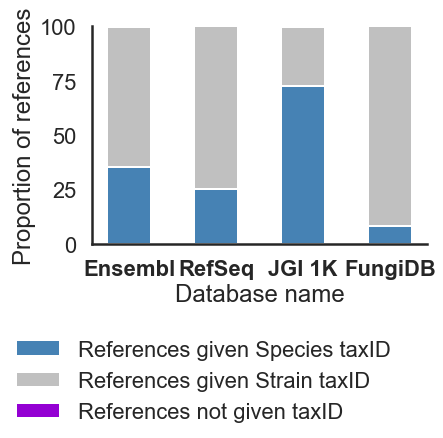

In [14]:
# BOILER PLATE ---------------------------------------------------------------------------------------------------------------
import sqlite3
import pandas as pd
import ete3
from ete3 import NCBITaxa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import seaborn as sns

# Set up variables and database connections for data processing --------------------------------------------------------------

ncbi_taxa = NCBITaxa()

# Connect to old database with straight taxids
# Using older version because it contains original taxids
db = sqlite3.connect(r'../data/fungi.db')

# Get taxids for each of the four databases (ENSEMBL, 1K, NCBI, FUNGIDB)

iso = pd.read_sql_query("SELECT GIVENTAXID, DBNAME FROM FUNGI_DB", db)

stc_e = 0.0
stc_1 = 0.0
stc_n = 0.0
stc_f = 0.0

spc_e = 0.0
spc_1 = 0.0
spc_n = 0.0
spc_f = 0.0

missed = 0.0
missing = []
missingd = []

# Count SpeciesID and StrainID classifications ---------------------------------------------------------------------------------
for index, row in iso.iterrows():
    tid = row["GIVENTAXID"]
    datan = row["DBNAME"]
    rank = ncbi_taxa.get_rank([tid])
    if bool(rank) == False: # If there is no rank given (either because tid is secondary taxid, has been deleted, does not exist in ncbi taxon database)
        missed += 1
        missing += [tid]
        missingd += [datan]
        continue
    if rank[tid] == "species":
        if datan == "ENSEMBLE":
            spc_e += 1
        elif datan == "1K":
            spc_1 += 1
        elif datan == "NCBI":
            spc_n += 1
        elif datan == "FUNGIDB":
            spc_f += 1
            # print(tid)
        else: 
            missed += 1
    else: # everything else assumed to be strain
        if datan == "ENSEMBLE":
            stc_e += 1
        elif datan == "1K":
            stc_1 += 1
        elif datan == "NCBI":
            stc_n += 1
        elif datan == "FUNGIDB":
            stc_f += 1
        else: 
            missed += 1

# organize and print data ---------------------------------------------------------------------------------------------------
            
spec_count = [spc_e, spc_n, spc_1, spc_f]
str_count = [stc_e, stc_n, stc_1, stc_f]


print("SPECIES count [Ensembl, NCBI, JGI, FUNGIDB]: ")
print(spec_count)

print("STRAIN count [Ensembl, NCBI, JGI, FUNGIDB]:")
print(str_count)

print(missed)
print(missing)
print(missingd)

# spc_f = 0 # The 11 cases of species taxid were inserted manually, in actuallity no ID was given, so we set to zero
# spec_count = [spc_e, spc_n, spc_1, spc_f]

# NUMBERS NEEDED FOR THE GRAPH
    # [ENSEMBLE, NCBI, 1k, FungiDB]
proportion_sp = [(spc_e/1014)*100, (spc_n/290)*100, (spc_1/1265)*100, (spc_f/134)*100]
proportion_st = [(stc_e/1014)*100, (stc_n/290)*100, (stc_1/1265)*100, (stc_f/134)*100]
proportion_mi = [(1-((spc_e+ stc_e)/1014))*100, (1-((spc_n+ stc_n)/290))*100, (1-((spc_1+ stc_1)/1265))*100, (1-((spc_f+ stc_f)/134))*100]

print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent species")
print("proportion_sp", proportion_sp)
print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent strain")
print("proportion_st", proportion_st)
print("[ENSEMBLE, NCBI, 1k, FUNGIDB] percent missing")
print("proportion_mi", proportion_mi)


# Set variables used in the graph ---------------------------------------------------------------------------------------------

proportion_sp = np.array(((spc_e/1014)*100, (spc_n/290)*100, (spc_1/1265)*100, (spc_f/134)*100))
proportion_st = np.array(((stc_e/1014)*100, (stc_n/290)*100, (stc_1/1265)*100, (stc_f/134)*100))
proportion_mi = np.array(((1-((spc_e+ stc_e)/1014))*100, (1-((spc_n+ stc_n)/290))*100, (1-((spc_1+ stc_1)/1265))*100, (1-((spc_f+ stc_f)/134))*100))

print("\n\n\nWHAT IS ACTUALLY ON GRAPH:")
print("[ENSEMBLE, RefSeq, 1k, FUNGIDB] percent species")
print("proportion_sp", proportion_sp)
print("[ENSEMBLE, RefSeq, 1k, FUNGIDB] percent strain")
print("proportion_st", proportion_st)
print("[ENSEMBLE, RefSeq, 1k, FUNGIDB] percent missing")
print("proportion_mi", proportion_mi)


# The position of the bars on the x-axis
r = [0,2,4,6]
 
# Names of group and bar width
names = ['Ensembl', 'RefSeq', 'JGI 1K', 'FungiDB']
barWidth = 1
 
# CREATE THE GRAPH-----------------------------------------------------------------------------------------------------------

g=sns.set_style("white")
g=sns.set_context("poster")

# Create orange bars default bar on bottom for species taxids
p1 = plt.bar(r, proportion_sp, color='steelblue', edgecolor='w', width=barWidth)
# Create green bars (middle), on top of species for strain
p2 = plt.bar(r, proportion_st, bottom=proportion_sp, color='silver', edgecolor='w', width=barWidth)
# Create blue bars (top), on top of all for missing taxids
p3 = plt.bar(r, proportion_mi, bottom=proportion_st+proportion_sp, color='darkviolet', edgecolor='w', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Database name")

# Custom Y axis
plt.ylabel("Proportion of references")

#  legend
plt.legend((p1[0], p2[0], p3[0]), ('References given Species taxID', 'References given Strain taxID', 'References not given taxID'),bbox_to_anchor=(0.95, -0.35),frameon=False)


# Save the graph ------------------------------------------------------------------------------------------------------------------

g=sns.despine()
# plt.savefig("supplementary_fig/ID_proportions.pdf", bbox_inches='tight')
plt.savefig("supplementary_fig/ID_proportions.png", bbox_inches='tight')
# plt.savefig("supplementary_fig/ID_proportions.eps")

plt.show();

db.close()